In [2]:
# HIDDEN
from myst_nb import glue

## Collisions in Hashing ##

In computer science, *hash functions* assign a code called a *hash value* to each member of a set of individuals. It's important that each individual be assigned a unique value. If two individuals are assigned the same value, there is a *collision*, and this causes trouble in identification. Yet it is cumbersome to keep track of which hash values have and have not been assigned, as the numbers of hash values and individuals can be very large.

What if the hash values were just assigned at random, without taking into account which of them have already been assigned? If there are a large number of distinct values and a relatively small number of individuals, then it seems reasonable to think that the chance of a collision will be small. For example, if there are 1,000 available hash values and only 5 individuals, it doesn't seem likely that you'll get a collision if you just pick a random sequence of 5 values for the 5 individuals.

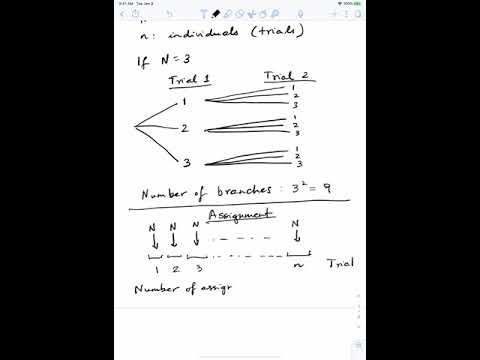

In [3]:
# VIDEO: Probability Model
from IPython.display import YouTubeVideo

vid_prob_model = YouTubeVideo("uFLsmVFcHXw")
glue("vid_prob_model", vid_prob_model)

```{dropdown} See More
:icon: video
{glue:}`vid_prob_model`
```

Let's make some assumptions about randomness and find the probability that there is no collision. Assume that there are $N$ hash values and $n$ individuals, and suppose your hash function is such that all $N^n$ assignments of values to individuals are equally likely. An assignment is a sequence $a_0 a_1 \ldots a_n$ where for each $i$, individual $i$ is assigned the hash value $a_i$.

Notice that we are assuming that each of the $n$ individuals could be assigned any of the $N$ values regardless of what has been assigned to others. This includes the truly unfortunate possibility that all $n$ individuals are assigned the same value.

### No Collisions ###

What is the chance that there are no collisions? 

If the number of individuals $n$ is greater than the number of hash values $N$, the answer is 0. If you have more individuals than values, then you are going to have to re-use some values and therefore can't avoid collisions. 

But we are interested in the case where $n$ is quite small, so we have no problem assuming that $n \le N$.

If you look back to Part (i) in the example about random number generators in the previous section, you will find that it is the same as our current question, in the case where $N = 10$ and $n=2$. We can just follow the same process to get our solution here.

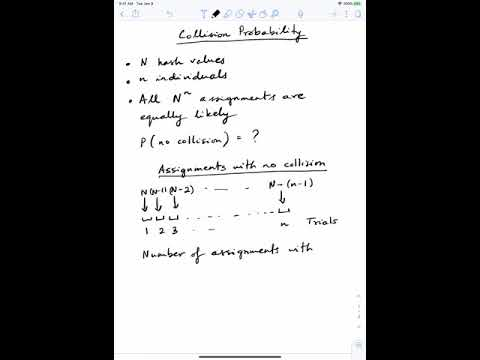

In [4]:
# VIDEO: Collision Probability
from IPython.display import YouTubeVideo
vid_collision_prob = YouTubeVideo('cD26s3DW-J8')
glue("vid_collision_prob", vid_collision_prob)

```{dropdown} See More
:icon: video
{glue:}`vid_collision_prob`
```

By assumption, all $N^n$ possible assignments are equally likely. Some of these assignments contain no collisions. Our job is to count how many.

You are familiar with Python's 0-origin indexing system, which comes in handy here. We have to count the number of sequences $a_0a_1 \ldots a_{n-1}$ where each $a_i$ is one of the $N$ hash values and all the $a_i$'s are different from each other. 

Let's do it this way:
- There are $N$ choices for $a_0$.
- For each of those choices, there are $N-1$ choices for $a_1$ because $a_1$ has to be different from $a_0$.
- Thus there are $N(N-1)$ ways of filling Place 0 and Place 1 in the sequence and avoiding a collision.
- For each of these $N(N-1)$ ways of choosing $a_0$ and $a_1$, there are $N-2$ choices for $a_2$. That's because $a_2$ has to be different from both $a_0$ and $a_1$ which are different from each other.
- Thus there are $N(N-1)(N-2)$ ways of filling Places 0, 1, and 2.
- Notice that for each $i$, the term in the product corresponding to Place $i$ is $N-i$. This makes the sequence easy to continue up to the end, that is, to Place $(n-1)$.

$$
\begin{align*}
P(\mbox{no collisions}) ~ &=~ 
\frac{N(N-1)(N-2) \cdots (N-(n-1))}{N^n} \\ \\
&=~ \frac{N(N-1)(N-2) \cdots (N-n+1)}{N^n}
\end{align*}
$$

"Continuing the sequence" is an informal process that needs a mathematical justification. You can prove it by the method of induction.

```{admonition} Quick Check
Suppose you roll an ordinary six-sided die four times and keep track of the sequence of faces that appear.

**a)** How many possible sequences are there?

**b)** Assuming that all the sequences are equally likely, what is the probability that four distinct faces appear?
```

```{admonition} Answer
:class: dropdown
(a) $6^4$ 

(b) $\frac{6 \times 5 \times 4 \times 3}{6^4}$
```

### Product of Fractions ###

In the chance of no collisions, there are $n$ terms in the product in the numerator, and there are $n$ factors of $N$ in the denominator. This allows us to write the formula in a different way, as a product of $n$ fractions:

$$
\begin{align*}
P(\mbox{no collisions}) ~ &=~
\frac{N}{N} \cdot \frac{N-1}{N} \cdot \frac{N-2}{N} \cdots \frac{N-n+1}{N} \\ \\
&=~ \prod_{i=0}^{n-1} \frac{N-i}{N}
\end{align*}
$$

The symbol $\prod$ is the upper case Greek letter *pi*. It stands for "product" just as $\sum$ stands for "sum".

And now the bad news:

### At Least One Collision ###
Each sequence either has at least one collision, or it has no collisions. No sequence can be in both of those categories, so by the rules of proportion we have

$$
P(\mbox{at least one collision}) ~=~ 1 ~-~ \prod_{i=0}^{n-1} \frac{N-i}{N}
$$

We have a formula. That's great! But is the answer large or is it small? It's not easy to tell just by looking at the formula. So let's start examining the answer in different ways. 

The first way is numerical. For this, we have to work with numerical values of $N$ and $n$. We'll do that in a context that has made this calculation famous.